In [1]:
import FdsPy.qe.myqengine as qe
import pandas as pd
indices = [('SP50','S&P 500'),
           ('180461','Nikkei 225'),
           ('180555','FTSE 100'),
           ('180596','DAX'),
           ('180354','SENSEX'),
           ('180264','IBOVESPA'),
           ('180454','Tadawul All Share')]

data_dict= {}
for ticker in indices:
    data_dict[f"Market Cap | {ticker[1]}"] = f"ZAV(USUM(PMWU(BENCH:{ticker[0]})=1,FREF_MARKET_VALUE_COMPANY(0,USD)))"

for ticker in indices:
    data_dict[f"Number of Constituents | {ticker[1]}"] = f"ZAV(UCOUNT(PMWU(BENCH:{ticker[0]})=1,FREF_MARKET_VALUE_COMPANY(0,USD)))"

In [2]:

ts = qe.TimeSeries(start_date = '0M-30AY',end_date='0M',frequency='M')
univ = qe.IdUniverse(['DUMMY'])
req = qe.Calculation(universe = univ,
                     dates = ts,
                     data_dict=data_dict)

req.query()

req.data

,DATE,UNIVERSE,Market Cap | S&P 500,Market Cap | Nikkei 225,Market Cap | FTSE 100,Market Cap | DAX,Market Cap | SENSEX,Market Cap | IBOVESPA,Market Cap | Tadawul All Share,Number of Constituents | S&P 500,Number of Constituents | Nikkei 225,Number of Constituents | FTSE 100,Number of Constituents | DAX,Number of Constituents | SENSEX,Number of Constituents | IBOVESPA,Number of Constituents | Tadawul All Share
0,19930831,DUMMY,3.586935e+06,1.394056e+06,8.306041e+05,2.518789e+05,1.938728e+04,67846.888424,1.789009e+05,500.0,174.0,101.0,26.0,35.0,35.0,31.0
1,19930930,DUMMY,3.544528e+06,1.325838e+06,8.250007e+05,2.497686e+05,2.058859e+04,77386.815800,1.728501e+05,500.0,175.0,102.0,26.0,35.0,35.0,31.0
2,19931029,DUMMY,3.635958e+06,1.329955e+06,8.460770e+05,2.695031e+05,2.051483e+04,113650.862051,1.860040e+05,500.0,176.0,101.0,26.0,36.0,36.0,31.0
3,19931130,DUMMY,3.614293e+06,1.142642e+06,8.492554e+05,2.679605e+05,2.633240e+04,122969.636750,1.847472e+05,500.0,176.0,101.0,26.0,40.0,38.0,31.0
4,19931231,DUMMY,3.679645e+06,1.179211e+06,9.167079e+05,2.911156e+05,2.687592e+04,114171.939799,2.034143e+05,500.0,176.0,100.0,26.0,40.0,39.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,20230428,DUMMY,3.786986e+07,3.785697e+06,2.686659e+06,1.785013e+06,2.153199e+06,765219.154840,2.729358e+06,503.0,225.0,100.0,40.0,101.0,88.0,40.0
357,20230531,DUMMY,3.814698e+07,3.845258e+06,2.500518e+06,1.660303e+06,2.216092e+06,775663.574220,2.496566e+06,503.0,225.0,100.0,40.0,101.0,86.0,40.0
358,20230630,DUMMY,4.058070e+07,4.028212e+06,2.588068e+06,1.747966e+06,2.327487e+06,895036.257424,2.679098e+06,503.0,225.0,100.0,40.0,101.0,86.0,40.0
359,20230731,DUMMY,4.188289e+07,4.149711e+06,2.677310e+06,1.787809e+06,2.358469e+06,930709.066965,2.738083e+06,503.0,225.0,100.0,40.0,101.0,85.0,40.0


In [3]:
df = req.data
i = 0
for x in range(2,9):
    df[f"Avg. Market Val per Consituent | {indices[i][1]}"] = df[df.columns[x]]/ df[df.columns[(x+7)]]
    i+=1
df['DATE'] = pd.to_datetime(df['DATE'])
cols = list(df.columns[-7:])
cols.append("DATE")
df_plot = df[cols].set_index("DATE")


df_plot = pd.DataFrame(df_plot.stack().rename({0:'Avg. Mkt Val per Consituent'})).rename(columns = {0:'Avg. Mkt Val Per Constituent'})


df_plot['label'] = df_plot.index.get_level_values(1)
df_plot['label_plot']=df_plot['label'].str.split('|')
df_plot['name'] = df_plot['label_plot'].apply(lambda x:x[1])

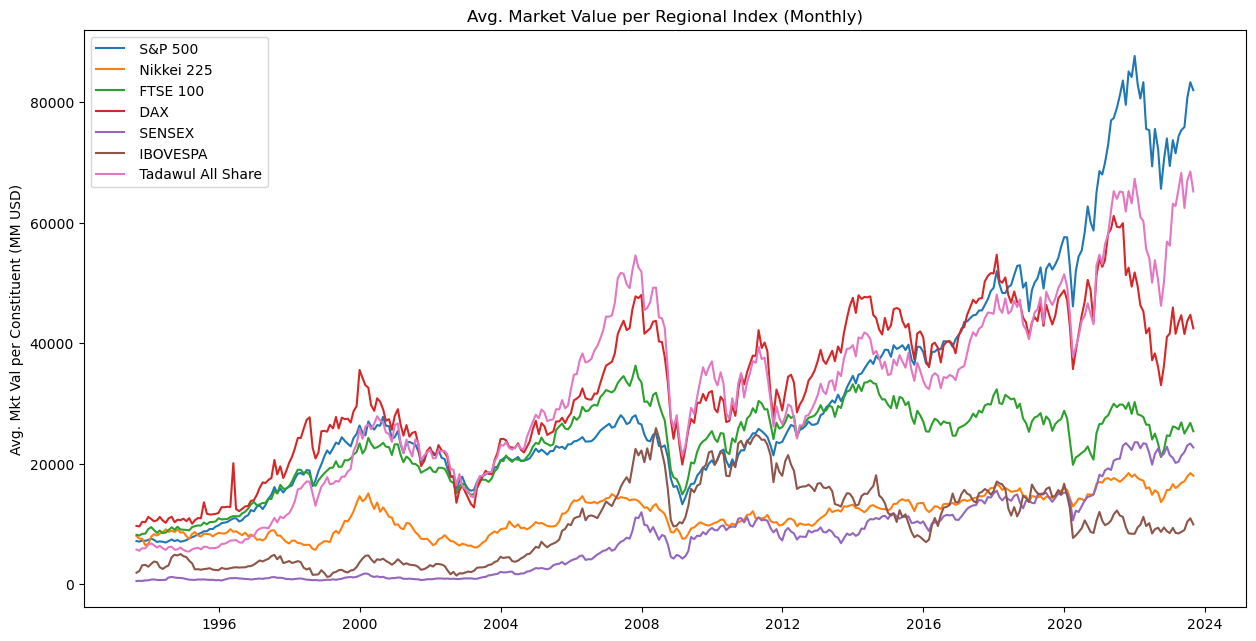

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(figsize = (15,7.5))
sns.lineplot(data = df_plot,
             x= 'DATE',
             y= 'Avg. Mkt Val Per Constituent',
             hue = 'name')

plt.ylabel('Avg. Mkt Val per Constituent (MM USD)')
plt.title('Avg. Market Value per Regional Index (Monthly)')
plt.legend().set_title('')
plt.xlabel('')
plt.savefig('regional_indices_avg_market_val.png')
plt.show()